# Configuração de ambiente

Importação das bibliotecas:
- Numpy: para manipulação de arrays
- Pandas: para manipulação de dataframes
- Matplotlib: para visualização de dados
- Seaborn: para visualização de dados
- Warnings: para poder alterar a visualização de warnings do sistema

E dentre outras para o aprendizado supervisionado.

In [209]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)

sns.set()

%matplotlib inline

from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering

# Leitura e visualização do dataset

Leitura do arquivo "dataset_clean.csv" através da função "read_csv" do Pandas e armazenamento do resultado na variável "df". Uso do parâmetro "sep" para informar qual o separador de colunas do arquivo e do parâmetro "encoding" para informar qual o tipo de codificação do arquivo.

In [210]:
csv_url = "https://github.com/viniciusgugelmin/data-science-3/blob/main/projects/valorant_stats/data/dataset_clean.csv?raw=true"

df = pd.read_csv(csv_url, sep=';', low_memory=False)

Exibição das 5 primeiras linhas do DataFrame através da função "head" do Pandas para verificar se o arquivo foi carregado corretamente e ter uma ideia do que ele contém. Já realizamos também uma ordenação pelo elo dos jogadores.

In [211]:
df = df.sort_values('rating', ascending=False).reset_index().drop('index', axis=1)
df.head()

,name,rating,damage_round,headshots,headshot_percent,aces,clutches,flawless,first_bloods,assists,kd_ratio,kills_round,score_round,win_percent,agent_1,gun1_name
0,ShimmyXD,Radiant,135.8,161.0,24.9,0,140,80,161.0,703.0,1.07,0.7,208.8,59.6,Fade,Vandal
1,ryanchan,Radiant,130.1,47.0,28.2,1,51,41,47.0,365.0,1.01,0.7,196.0,54.4,Sova,Phantom
2,SHREK,Radiant,141.7,114.0,21.6,2,93,44,114.0,281.0,1.05,0.8,218.0,53.7,Neon,Vandal
3,Dimislavos,Radiant,120.5,51.0,23.5,0,62,39,51.0,254.0,0.92,0.6,185.8,59.5,Omen,Vandal
4,AVN RaksO,Radiant,143.3,214.0,24.0,2,129,74,214.0,454.0,1.05,0.8,216.5,52.1,Killjoy,Phantom


# Explicação sobre o trabalho a ser realizado

O dataset escolhido tem como base informações sobre como os melhores jogadores de Valorant do Episódio 4, Ato 3, se saíram dentro nos seus jogos. 

As colunas a serem trabalhadas contém informações sobre o nome dentro do jogo, elo/rank, dano por rodada, eliminações com tiro na cabeça, percentual de eliminações com tiro na cabeça, rodadas em que eliminou todos sozinho, rodadas em que ficou sozinho e ganhou, em que todos do time eliminaram alguém, rodadas em que foi o primeiro a eliminar, assistência em eliminações, percentual de eliminações e mortes, pontuação por rodada, percentual de vitória, melhor agente e melhor arma.

O intuito deste estudo é extrairmos algumas informações dessa base de dados, inserirmos alguns gráficos e realizarmos um aprendizado de máquina para conseguirmos prever o elo/ranque de um jogador só com base em seus resultados dentro do jogo.

# Perguntas iniciais

- Qual o jogador com maior percentual de vitórias e o com o menor?

In [212]:
def printWinOrder(_df, str):
  print('Jogador com', str, 'percentual de vitórias:', _df['name'][0], '\nPercentual:', _df['win_percent'][0], '\nElo:', _df['rating'][0])

df_win_order = df.copy()

df_win_order = df_win_order.sort_values('win_percent', ascending=False).reset_index().drop('index', axis=1)
printWinOrder(df_win_order, 'maior')

print('')

df_win_order = df_win_order.sort_values('win_percent', ascending=True).reset_index().drop('index', axis=1)
printWinOrder(df_win_order, 'menor')

Jogador com maior percentual de vitórias: L DANCE 69 
Percentual: 79.7 
Elo: Radiant

Jogador com menor percentual de vitórias: REV1 
Percentual: 40.2 
Elo: Diamond -


- Qual o jogador com mais aces e o com o menor?

In [213]:
def printAcesOrder(_df, str):
  print('Jogador com', str, 'aces:', _df['name'][0], '\nAces:', _df['aces'][0], '\nElo:', _df['rating'][0])

df_aces_order = df.copy()

df_aces_order = df_aces_order.sort_values('aces', ascending=False).reset_index().drop('index', axis=1)
printAcesOrder(df_aces_order, 'mais')

print('')

df_aces_order = df_aces_order.sort_values('aces', ascending=True).reset_index().drop('index', axis=1)
printAcesOrder(df_aces_order, 'menos')

Jogador com mais aces: Tronix 
Aces: 24 
Elo: Immortal

Jogador com menos aces: ShimmyXD 
Aces: 0 
Elo: Radiant


- Quantos jogadores temos de cada elo?

In [214]:
def printRankingCount(elo):
  _total = len(df[df['rating'] == elo])
  print('Elo:', elo, '\nTotal:', _total, end='\n\n')
  return _total

radiantTotal = printRankingCount('Radiant')
immortalTotal = printRankingCount('Immortal')
diamondTotal = printRankingCount('Diamond -')

Elo: Radiant 
Total: 11225

Elo: Immortal 
Total: 11703

Elo: Diamond - 
Total: 17799



- Qual é o total de jogadores que tem cada agente como preferido?

In [215]:
def printAgentCount(agent):
  _total = len(df[df['agent_1'] == agent])
  print('Agente:', agent, '\nTotal:', _total, end='\n\n')
  return _total

agentsTotal = []

for agent in df['agent_1'].unique():
  agentsTotal.append(printAgentCount(agent))

Agente: Fade 
Total: 3617

Agente: Sova 
Total: 2413

Agente: Neon 
Total: 475

Agente: Omen 
Total: 2554

Agente: Killjoy 
Total: 234

Agente: KAY/O 
Total: 725

Agente: Viper 
Total: 1466

Agente: Reyna 
Total: 5204

Agente: Sage 
Total: 1952

Agente: Chamber 
Total: 9885

Agente: Raze 
Total: 2942

Agente: Yoru 
Total: 293

Agente: Brimstone 
Total: 1389

Agente: Jett 
Total: 6308

Agente: Breach 
Total: 213

Agente: Skye 
Total: 649

Agente: Cypher 
Total: 156

Agente: Astra 
Total: 208

Agente: Phoenix 
Total: 44



# Visualização dos dados

O gráfico abaixo mostra a distribuição de preferência de jogadores por agente através do barplot do seaborn.

[Text(0.5, 1.0, 'Distribuição de agentes por preferência de jogadores')]

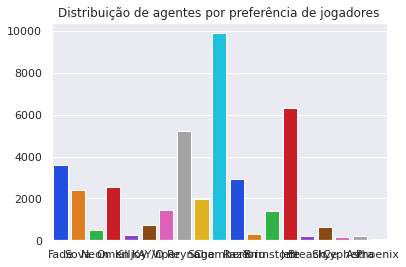

In [216]:
sns.barplot(x=df['agent_1'].unique(), y=agentsTotal, palette="bright").set(title='Distribuição de agentes por preferência de jogadores')

Através do histplot do seaborn conseguimos visualizar o percentual de jogadores por elo.

[Text(0.5, 1.0, 'Pecentual de de jogadores por elo')]

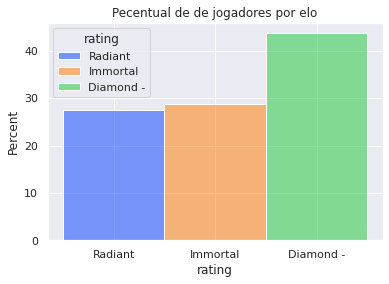

In [217]:
sns.histplot(data=df, x="rating", hue="rating", stat="percent", palette="bright").set(title='Pecentual de de jogadores por elo')

# Correlação 

Não entrava muito no intuito da pesquisa, mas acredito que seja viável realizar uma verificação de correlação dos dados da tabela para também conseguirmos compreender como funciona cada propriedade e também ver qual pode influenciar em qual.

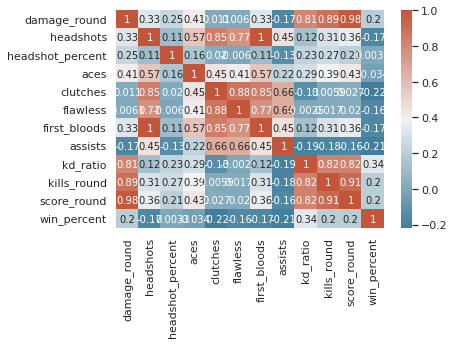

In [218]:
corr = df.corr()
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(df.corr(),cmap=cmap, annot=True);

Esse gráfico de calor ajuda bastante para quem já compreende como o jogo funciona, e é interessante analisar que a quantidade de dano por rodada influencia fortemente na pontuação durante a rodada, algo que muitos jogadores não devem saber, e talvez ajudaria a subir de elo mais rapidamente.

# Transformação de variáveis categóricas nominais

Vamos verificar agora quais colunas vamos precisar para o aprendizado de máquina e quais iremos precisar tratar e transformar para variáveis categóricas númericas ordinais.

In [219]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40727 entries, 0 to 40726
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              40727 non-null  object 
 1   rating            40727 non-null  object 
 2   damage_round      40727 non-null  float64
 3   headshots         40727 non-null  float64
 4   headshot_percent  40727 non-null  float64
 5   aces              40727 non-null  int64  
 6   clutches          40727 non-null  int64  
 7   flawless          40727 non-null  int64  
 8   first_bloods      40727 non-null  float64
 9   assists           40727 non-null  float64
 10  kd_ratio          40727 non-null  float64
 11  kills_round       40727 non-null  float64
 12  score_round       40727 non-null  float64
 13  win_percent       40727 non-null  float64
 14  agent_1           40727 non-null  object 
 15  gun1_name         40727 non-null  object 
dtypes: float64(9), int64(3), object(4)
memor

Vamos o nome, agente preferido e arma preferida pois não influenciam positivamente para o aprendizado, e vamos tratar o elo.

In [220]:
le = LabelEncoder()
df_new = df.copy()

df_new["rating"] = le.fit_transform(df_new.rating.values)

df_new = df_new.drop(['name'], axis=1)
df_new = df_new.drop(['agent_1'], axis=1)
df_new = df_new.drop(['gun1_name'], axis=1)

for i in df_new["rating"].unique():
  print("Elo:", le.inverse_transform([i])[0], "\nCategoria:", i)
  print("")

Elo: Radiant 
Categoria: 2

Elo: Immortal 
Categoria: 1

Elo: Diamond - 
Categoria: 0



Vamos analisar também qual a quantidade de dados que iremos trabalhar no aprendizado de máquina.

In [221]:
df_new.shape

(40727, 13)

# Legenda

Vamos pegar o dicionário de dados e trazer atualizado com as colunas que iremos trabalhar no aprendizado de máquina, lembrando que o nosso objetivo é tentar prever o elo, ou seja, a coluna "rating" do jogador.

In [222]:
csv_url = "https://github.com/viniciusgugelmin/data-science-3/blob/main/projects/valorant_stats/data/data_dictionary.csv?raw=true"

df_dictionary = pd.read_csv(csv_url, sep=';', low_memory=False)
df_dictionary.rename(columns = {'region' : 'Coluna', 'área do servidor' : 'Descrição'}, inplace = True)
df_dictionary = df_dictionary[df_dictionary["Coluna"].isin(df_new.columns)].reset_index().drop('index', axis=1)
df_dictionary

,Coluna,Descrição
0,rating,elo/rank do jogador
1,damage_round,média de dano efetuado por rodada em todos os ...
2,headshots,total de pessoas eliminadas com tiro na cabeça
3,headshot_percent,percentual de tiros que foram na cabeça
4,aces,número total de rodadas que eliminou todos os ...
5,clutches,número total de rodadas que ficou vivo sozinho...
6,flawless,número total de rodadas em que todo mundo da e...
7,first_bloods,número total de primeiras eliminações de jogad...
8,assists,número total de participações em eliminações d...
9,kd_ratio,proporção de eliminações e de vezes que foi el...


# Atributos previsores e alvo

In [223]:
df_new.head()

,rating,damage_round,headshots,headshot_percent,aces,clutches,flawless,first_bloods,assists,kd_ratio,kills_round,score_round,win_percent
0,2,135.8,161.0,24.9,0,140,80,161.0,703.0,1.07,0.7,208.8,59.6
1,2,130.1,47.0,28.2,1,51,41,47.0,365.0,1.01,0.7,196.0,54.4
2,2,141.7,114.0,21.6,2,93,44,114.0,281.0,1.05,0.8,218.0,53.7
3,2,120.5,51.0,23.5,0,62,39,51.0,254.0,0.92,0.6,185.8,59.5
4,2,143.3,214.0,24.0,2,129,74,214.0,454.0,1.05,0.8,216.5,52.1


In [224]:
previsores = df_new.iloc[:, 1:13].values
previsores

array([[135.8, 161. ,  24.9, ...,   0.7, 208.8,  59.6],
       [130.1,  47. ,  28.2, ...,   0.7, 196. ,  54.4],
       [141.7, 114. ,  21.6, ...,   0.8, 218. ,  53.7],
       ...,
       [141.5, 135. ,  14.4, ...,   0.8, 216.3,  44.6],
       [129.9, 151. ,  34.8, ...,   0.7, 198.7,  44.3],
       [148.1, 177. ,  23.1, ...,   0.8, 229.8,  51.8]])

In [225]:
alvo = df_new.iloc[:, 0].values
alvo

array([2, 2, 2, ..., 0, 0, 0])